In [33]:
import os
os.environ['XLA_PYTHON_CLIENT_MEM_FRACTION'] = '.3'

from algorithms.utils import restore_state_multi_agent_adaptable_rb
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [34]:
directory = '/media/samuele/Disco/PycharmProjectsUbuntu/MARL-CER/trained_agents/20250411_105752_bat_net_type_actor_critic_rec_net_type_actor_critic_concat_lr_bat_None_lr_REC_cosine_tot_timesteps_5256000_lr_sched_cosine_multiagent'

network_rec, config, world_metadata, train_info, val_info = restore_state_multi_agent_adaptable_rb(directory)

norm rec


In [35]:
config

{'ACTIVATION': 'tanh',
 'CLIP_EPS': 0.2,
 'DEBUG': False,
 'ENT_COEF': 0.0,
 'ENV_NAME': None,
 'ENV_TYPE': 'normal',
 'FRACTION_DYNAMIC_LR_REC': 1.0,
 'GAE_LAMBDA': 0.98,
 'GAMMA': 0.99,
 'INITIAL_POLICIES': (True, False, True),
 'IS_AGENT_ADAPTABLE': (True, False, False),
 'LOGISTIC_FUNCTION_TO_ACTOR': False,
 'LR_REC': 0.0005,
 'LR_REC_MIN': 1e-05,
 'LR_SCHEDULE': 'cosine',
 'LSTM_ACTIVATION': 'tanh',
 'LSTM_NET_ARCH': (24, 12),
 'MAX_GRAD_NORM': 0.5,
 'MINIBATCH_SIZE_REC': 1024,
 'NETWORK_TYPE_BATTERIES': 'actor_critic',
 'NETWORK_TYPE_REC': 'actor_critic_concat',
 'NET_ARCH_REC': (64, 32),
 'NORMALIZE_ADVANTAGES': False,
 'NORMALIZE_ENV': False,
 'NORMALIZE_NN_INPUTS': True,
 'NORMALIZE_REWARD_FOR_GAE_AND_TARGETS': True,
 'NORMALIZE_TARGETS': False,
 'NUM_BATTERY_AGENTS': 3,
 'NUM_ENVS': 4,
 'NUM_MINIBATCHES': 32,
 'NUM_MINIBATCHES_REC': 32,
 'NUM_STEPS': 8192,
 'NUM_UPDATES': 160,
 'PASSIVE_HOUSES': True,
 'REC_ACTION_SPACE_SIZE': 3,
 'REC_OBS_IS_LOCAL': {'cos_day_of_year': False

In [36]:
world_metadata

WorldMetadata(world_train={'num_battery_houses': 3, 'battery_observations': ['demand', 'generation', 'temperature', 'soc', 'day_of_year', 'seconds_of_day', 'selling_price', 'buying_price', 'network_REC_diff'], 'rec_observations': ['demands_base_battery_houses', 'demands_battery_battery_houses', 'generations_base_battery_houses', 'mean_demands_base', 'mean_demands_batteries', 'mean_generations', 'day_of_year', 'seconds_of_day', 'network_REC_plus', 'network_REC_minus'], 'demand': {'path': 'ernestogym/ernesto_jax/data/demand/rse_profiles_train.csv', 'timestep': 3600, 'test_profiles': None, 'data_usage': 'end'}, 'generation': {'path': {'battery_houses_generation': ['ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_-60deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg_0deg_2015_2018._train.csv', 'ernestogym/ernesto_jax/data/generation/Timeseries_45.235_10.693_SA3_3kWp_crystSi_14_30deg

In [37]:
jax.tree.map(lambda x: jnp.isnan(x).any(axis=jnp.arange(1, x.ndim)), train_info)

{'actions': {'REC_agent': Array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, Fal

In [38]:
jax.tree.map(lambda x: x.shape, val_info)

{'actions_batteries': (16, 43350, 3),
 'actions_rec': (16, 43350, 3),
 'balance_minus': (16, 43350),
 'balance_plus': (16, 43350),
 'buy_prices': (16, 43350, 3),
 'demands': (16, 43350, 3),
 'dones': {'REC_agent': (16, 43350),
  '__all__': (16, 43350),
  'battery_agent_0': (16, 43350),
  'battery_agent_1': (16, 43350),
  'battery_agent_2': (16, 43350)},
 'energy_to_batteries': (16, 43350, 3),
 'generations': (16, 43350, 3),
 'is_battery_policy_only_market': (16, 43350, 3),
 'norm_reward': {'r_clipping': (16, 43350, 3),
  'r_deg': (16, 43350, 3),
  'r_glob': (16, 43350, 3),
  'r_op': (16, 43350, 3),
  'r_trad': (16, 43350, 3)},
 'pure_reward': {'r_clipping': (16, 43350, 3),
  'r_deg': (16, 43350, 3),
  'r_glob': (16, 43350, 3),
  'r_op': (16, 43350, 3),
  'r_trad': (16, 43350, 3)},
 'r_tot': (16, 43350, 3),
 'rec_reward': (16, 43350),
 'self_consumption': (16, 43350),
 'sell_prices': (16, 43350, 3),
 'soc': (16, 43350, 3),
 'soh': (16, 43350, 3),
 'tot_incentives': (16, 43350),
 'weig_r

In [39]:
val_info['r_tot'].shape #.sum(axis=(1, 2)).shape

(16, 43350, 3)

In [40]:
lim = config['NUM_RL_AGENTS'] if 'NUM_RL_AGENTS' in config.keys() else config['NUM_BATTERY_AGENTS']
a = val_info['r_tot'][..., :lim].sum(axis=(1, 2))
a

array([-108179.336, -131129.73 , -109325.61 , -116142.14 , -113093.336,
       -113413.914, -114692.27 , -114136.64 , -116772.21 , -114528.125,
       -112331.555, -110763.336, -108687.53 , -109371.17 , -109229.695,
       -108846.78 ], dtype=float32)

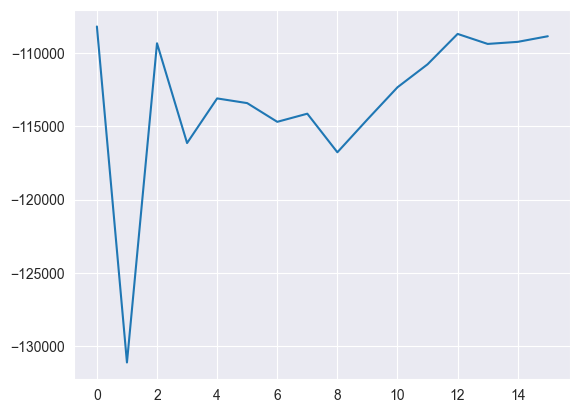

In [41]:
plt.plot(a)

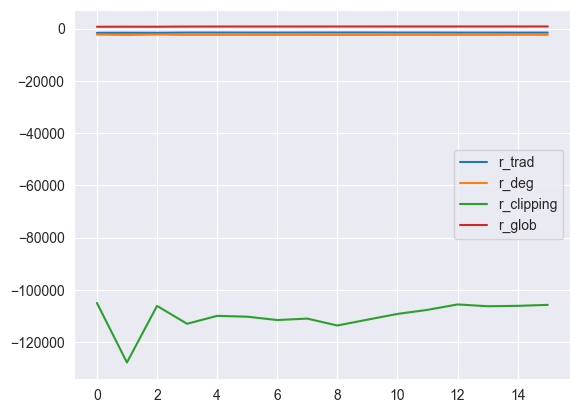

In [42]:
plt.plot(val_info['weig_reward']['r_trad'][..., :lim].sum(axis=(1, 2)), label='r_trad')
plt.plot(val_info['weig_reward']['r_deg'][..., :lim].sum(axis=(1, 2)), label='r_deg')
plt.plot(val_info['weig_reward']['r_clipping'][..., :lim].sum(axis=(1, 2)), label='r_clipping')
plt.plot(val_info['weig_reward']['r_glob'][..., :lim].sum(axis=(1, 2)), label='r_glob')
plt.legend()

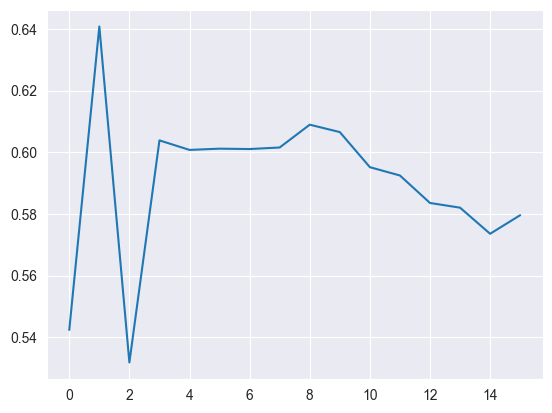

In [43]:
plt.plot(val_info['soc'][..., :lim].mean(axis=(1, 2)))

In [44]:
val_info['rec_reward'].sum(axis=1)

array([7876243.5, 8017111.5, 7879853.5, 8634496. , 8735984. , 8771097. ,
       8785318. , 8832426. , 8838906. , 8860212. , 8880131. , 8886557. ,
       8894673. , 8934389. , 8893719. , 8907170. ], dtype=float32)

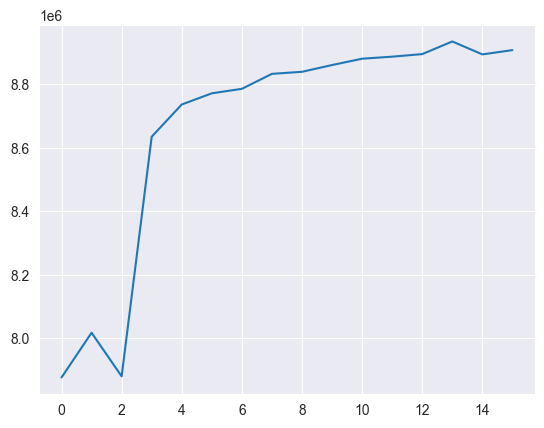

In [45]:
plt.plot(val_info['rec_reward'].sum(axis=1))

In [46]:
np.var(val_info['actions_rec'], axis=-1).shape

(16, 43350)

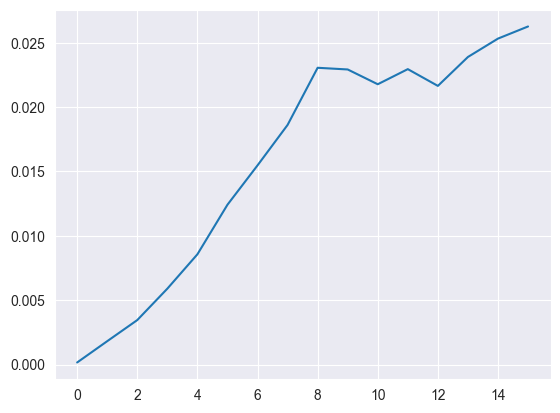

In [47]:
plt.plot(np.var(val_info['actions_rec'], axis=-1).mean(axis=1))

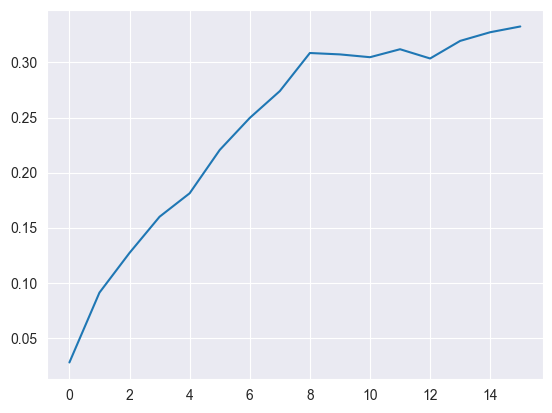

In [48]:
plt.plot(np.mean(np.max(val_info['actions_rec'], axis=-1) - np.min(val_info['actions_rec'], axis=-1), axis=1))